## Goal:

to identify patterns that determine whether a company successfully gaining best form or not in order to spot potential company to plan investment plan in those companies who work at the best industry at the time.

## STEP I: ANALYSIS OF GENERAL INFORMATION:

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
import scipy 
import seaborn as sns
from datetime import datetime

In [2]:
companies = pd.read_csv("Unicorn_Companies.csv")


In [3]:
companies.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [4]:
companies.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [5]:
print('The NaN statistics')
display(companies.isnull().sum()/len(companies)*100)


The NaN statistics


Company             0.000000
Valuation           0.000000
Date Joined         0.000000
Industry            0.000000
City                1.489758
Country             0.000000
Continent           0.000000
Year Founded        0.000000
Funding             0.000000
Select Investors    0.093110
dtype: float64

In [6]:
print('Number of duplicates: ', companies.duplicated().sum())

Number of duplicates:  0


In [7]:
print('Rows with NaN in City column') 
display(companies[companies['City'].isnull()])

Rows with NaN in City column


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
12,FTX,$32B,2021-07-20,Fintech,NaN,Bahamas,North America,2018,$2B,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,$4B,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,$263M,Kuang-Chi
242,Moglix,$3B,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,$471M,"Jungle Ventures, Accel, Venture Highway"
251,Trax,$3B,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,$1B,"Hopu Investment Management, Boyu Capital, DC T..."
325,Amber Group,$3B,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,$328M,"Tiger Global Management, Tiger Brokers, DCM Ve..."
382,Ninja Van,$2B,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,$975M,"B Capital Group, Monk's Hill Ventures, Dynamic..."
541,Advance Intelligence Group,$2B,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,$536M,"Vision Plus Capital, GSR Ventures, ZhenFund"
811,Carousell,$1B,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,$288M,"500 Global, Rakuten Ventures, Golden Gate Vent..."
848,Matrixport,$1B,2021-06-01,Fintech,NaN,Singapore,Asia,2019,$100M,"Dragonfly Captial, Qiming Venture Partners, DS..."
880,bolttech,$1B,2021-07-01,Fintech,NaN,Singapore,Asia,2018,$210M,"Mundi Ventures, Doqling Capital Partners, Acti..."


In [8]:
print('Rows with NaN in Select Investors column') 
display(companies[companies['Select Investors'].isnull()])


Rows with NaN in Select Investors column


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
629,LinkSure Network,$1B,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,$52M,NaN


In [9]:
for column in companies.columns:
    print(column, ':', companies[column].unique()) 
    print() 
    # עובר על כל עמודה בדאטא פריים 'companies', מדפיס את שם העמודה ואת כל הערכים הייחודיים בה. מוסיף שורה ריקה לאחר כל עמודה לנוחות קריאה.
#.unique()  מחזיר רשימה של כל הערכים הייחודיים בעמודה, שימושי לזיהוי מגוון הנתונים ולזיהוי ערכים חריגים או שגיאות

Company : ['Bytedance' 'SpaceX' 'SHEIN' ... 'Zihaiguo' 'Zopa' 'Zwift']

Valuation : ['$180B' '$100B' '$95B' '$46B' '$40B' '$39B' '$38B' '$33B' '$32B' '$27B'
 '$25B' '$22B' '$20B' '$18B' '$17B' '$15B' '$14B' '$13B' '$12B' '$11B'
 '$10B' '$9B' '$8B' '$7B' '$6B' '$5B' '$4B' '$3B' '$2B' '$1B']

Date Joined : ['2017-04-07' '2012-12-01' '2018-07-03' '2014-01-23' '2011-12-12'
 '2018-01-08' '2019-05-02' '2014-12-30' '2017-12-20' '2019-02-05'
 '2018-04-26' '2018-10-26' '2021-07-20' '2012-06-06' '2019-03-05'
 '2017-07-25' '2021-04-07' '2016-03-31' '2022-01-05' '2017-05-31'
 '2019-12-03' '2018-04-20' '2020-03-01' '2020-10-08' '2021-02-17'
 '2018-12-11' '2018-10-16' '2019-10-10' '2019-07-12' '2019-06-12'
 '2019-10-30' '2018-11-15' '2018-10-05' '2021-03-26' '2018-08-06'
 '2018-07-06' '2021-10-13' '2020-07-22' '2021-06-03' '2018-05-29'
 '2018-06-21' '2021-05-08' '2016-12-22' '2021-10-08' '2018-06-26'
 '2018-07-18' '2019-12-20' '2018-09-25' '2018-06-05' '2018-11-14'
 '2021-10-28' '2016-03-12' '2021-1

In [10]:
display(companies.describe()) # מציג סטטיסטיקות תיאוריות בסיסיות עבור הדאטא פריים 'companies'. כולל ספירה, ממוצע, סטיית תקן, מינימום, מקסימום, וערכי הרבעונים לעמודות נומריות.
#.describe()  מחשב ומציג סטטיסטיקות תיאוריות כגון ממוצע, סטיית תקן, מינימום, מקסימום, וערכי הרבעונים עבור עמודות נומריות בדאטא פריים. שימושי לקבלת מבט כולל על התפלגות הנתונים.

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [11]:
display(companies.describe(include=['object'])) # מציג סטטיסטיקות תיאוריות עבור עמודות שהן מסוג אובייקט (לרוב מחרוזות) בדאטא פריים 'companies'. כולל ספירה, ערכים ייחודיים, הערך הנפוץ ביותר ותדירותו.


,Company,Valuation,Date Joined,Industry,City,Country,Continent,Funding,Select Investors
count,1074,1074,1074,1074,1058,1074,1074,1074,1073
unique,1073,30,639,16,256,46,6,539,1058
top,Bolt,$1B,2021-07-13,Fintech,San Francisco,United States,North America,$1B,Sequoia Capital
freq,2,471,9,224,152,562,589,60,3


## General information:
####   1. NaN values: the only columns contains NaN values is 'City' and 'Select Investors'.
- A. City contains 1061 NaN values which mean 1.4% are NaN  data.
- B. Select Investors contains 0.09% NaN values and its just one row.
####    2. there is no entirely duplicates  rows according to the above. but if we look closely we can see that there is "Artificial intelligence" and "Artificial Intelligence" industries which are the same industry but for Python they are two, so we should make them one in the prespective of Python. 
####    3. there are data types need to change:
-        A. Funding: object to int
-        B. Valuation: object to int
    

## STEP II: Preparation of Data:

In [12]:
# converting column names to lowercase 
companies = companies.rename(columns=str.lower)

### Processing NaN values

In [13]:
companies_upd = companies.fillna({'city': 'unkown'}) # מייצר גרסה מעודכנת של הדאטא פריים 'companies', בה כל ערך חסר בעמודת 'city' מוחלף במחרוזת 'unkown'.


### changing data types

In [14]:
companies_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company           1074 non-null   object
 1   valuation         1074 non-null   object
 2   date joined       1074 non-null   object
 3   industry          1074 non-null   object
 4   city              1074 non-null   object
 5   country           1074 non-null   object
 6   continent         1074 non-null   object
 7   year founded      1074 non-null   int64 
 8   funding           1074 non-null   object
 9   select investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [15]:
companies_upd

,company,valuation,date joined,industry,city,country,continent,year founded,funding,select investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital"
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings"
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."


companies_upd['funding']


In [16]:
companies_upd = companies_upd[companies_upd['funding'].ne('Unknown')]
companies_upd['funding']

0         $8B
1         $7B
2         $2B
3         $2B
4         $4B
        ...  
1069    $379M
1070    $990M
1071     $80M
1072    $792M
1073    $620M
Name: funding, Length: 1062, dtype: object

### delete all dollar  and M, B replace it with 000.

In [17]:
# companies_upd['funding'] = companies_upd['funding'].str.replace('$', '')
# companies_upd['funding'] = companies_upd['funding'].str.replace('M', '')
# companies_upd['funding'] = companies_upd['funding'].str.replace('B', '000')

# companies_upd['valuation'] = companies_upd['valuation'].str.replace('$', '')
# companies_upd['valuation'] = companies_upd['valuation'].str.replace('M', '')
# companies_upd['valuation'] = companies_upd['valuation'].str.replace('B', '000')

# companies_upd['funding']
# Convert 'funding' and 'valuation' columns to string type before applying string methods
# Ensure we're modifying the DataFrame directly; this is more about clarity than necessity in this specific case
companies_upd = companies_upd.copy()

# Convert 'funding' and 'valuation' columns to string
companies_upd.loc[:, 'funding'] = companies_upd['funding'].astype(str)
companies_upd.loc[:, 'valuation'] = companies_upd['valuation'].astype(str)

# Replace '$', 'M', and 'B' with appropriate numeric representations
companies_upd.loc[:, 'funding'] = companies_upd.loc[:, 'funding'].str.replace('$', '').str.replace('M', ' ').str.replace('B', ' ')
companies_upd.loc[:, 'valuation'] = companies_upd.loc[:, 'valuation'].str.replace('$', '').str.replace('M', ' ').str.replace('B', ' ')

# Convert back to numeric, handling any errors by converting them to NaN
companies_upd.loc[:, 'funding'] = pd.to_numeric(companies_upd['funding'], errors='coerce')
companies_upd.loc[:, 'valuation'] = pd.to_numeric(companies_upd['valuation'], errors='coerce')

# Verify the changes
print(companies_upd[['funding', 'valuation']].head(10))



  funding valuation
0       8       180
1       7       100
2       2       100
3       2        95
4       4        46
5     572        40
6       2        40
7       3        39
8      14        38
9       3        38


In [18]:
# Convert to numeric, setting errors='coerce' to turn problematic values into NaNs, then fill NaNs with 0
companies_upd['funding'] = pd.to_numeric(companies_upd['funding'], errors='coerce').fillna(0).astype(int)
companies_upd['valuation'] = pd.to_numeric(companies_upd['valuation'], errors='coerce').fillna(0).astype(int)


### deal with "Artificial intelligence" and "Artificial Intelligence"

In [19]:
#companies_upd['industry'] = companies_upd['industry'].str.replace('Artificial intelligence', 'Artificial Intelligence')
#companies_upd['industry'] = companies_upd['industry'].str.replace('artificial intelligence', 'Artificial Intelligence', flags=re.IGNORECASE, regex=True)
#companies_upd['industry'] = companies_upd['industry'].str.replace('artificial intelligence', 'Artificial Intelligence', flags=re.IGNORECASE, regex=True)
import re

companies_upd['industry'] = companies_upd['industry'].str.replace('artificial intelligence', 'Artificial Intelligence', flags=re.IGNORECASE, regex=True)



## STEP III: DEEP ANALYSIS OF DATA

### 1. How many companies were founded in different years? in order to spot a significant period.

C:\Users\Admin\OneDrive - Ariel University\new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

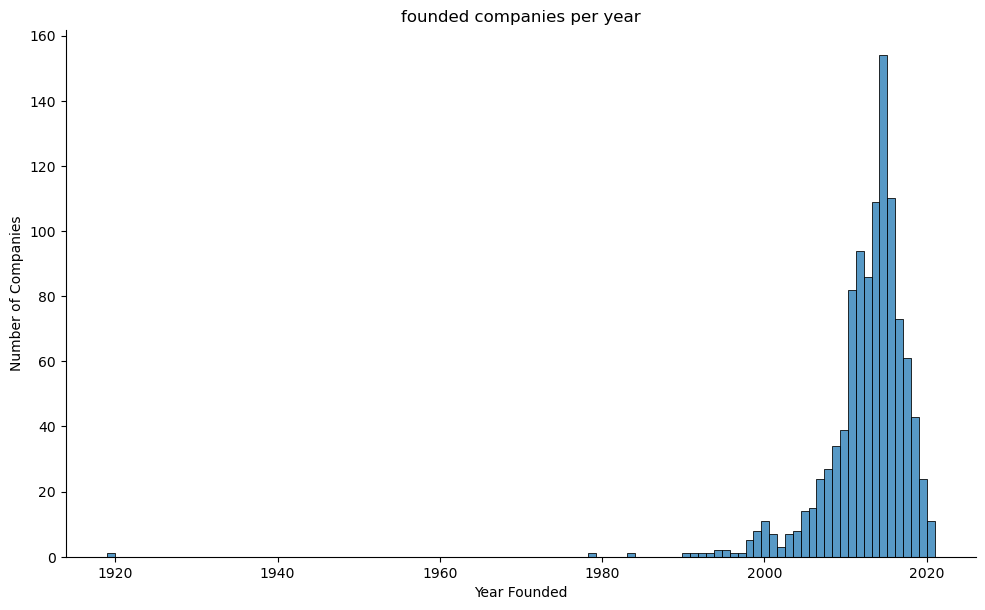

In [20]:
plt.figure(figsize=(10, 6))
sns.displot(companies_upd, x='year founded', height=6, aspect=1.66) 
plt.title('founded companies per year')
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.show()

we can see from the graph that there was a bit founded companies around 1920, and start to established more companies around 2015
, lets take a look after 2007:

C:\Users\Admin\OneDrive - Ariel University\new\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


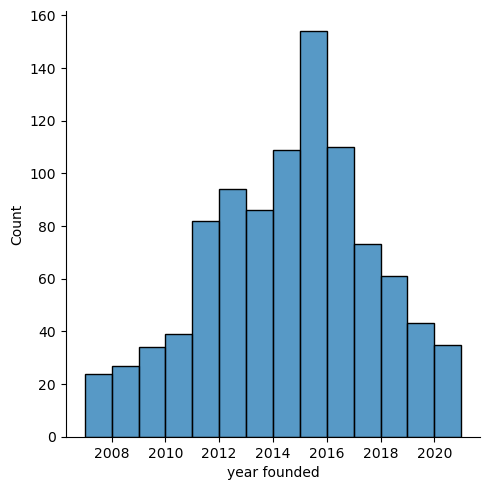

In [21]:
companies_after_2007 = companies_upd[companies_upd['year founded'] >= 2007]
sns.displot(companies_after_2007, x='year founded', binwidth=1)

### 2. Which industries have the most popularity among companies in the new era? Which industry have the best growing company counts in the present? how mature the industry? is it popular becuese its just a new thing or its based on a lot of studies and proven success of existing company? is its popularity fading or growing find by looking to how fast it grow?

In [22]:
industry_counts = companies_upd.groupby('industry').size().reset_index(name='Number of Companies')
industry_counts

,industry,Number of Companies
0,Artificial Intelligence,84
1,Auto & transportation,31
2,Consumer & retail,24
3,Cybersecurity,50
4,Data management & analytics,40
5,E-commerce & direct-to-consumer,109
6,Edtech,28
7,Fintech,222
8,Hardware,34
9,Health,74


<Axes: title={'center': 'Number of companies per industry'}, xlabel='Number of Companies', ylabel='industry'>

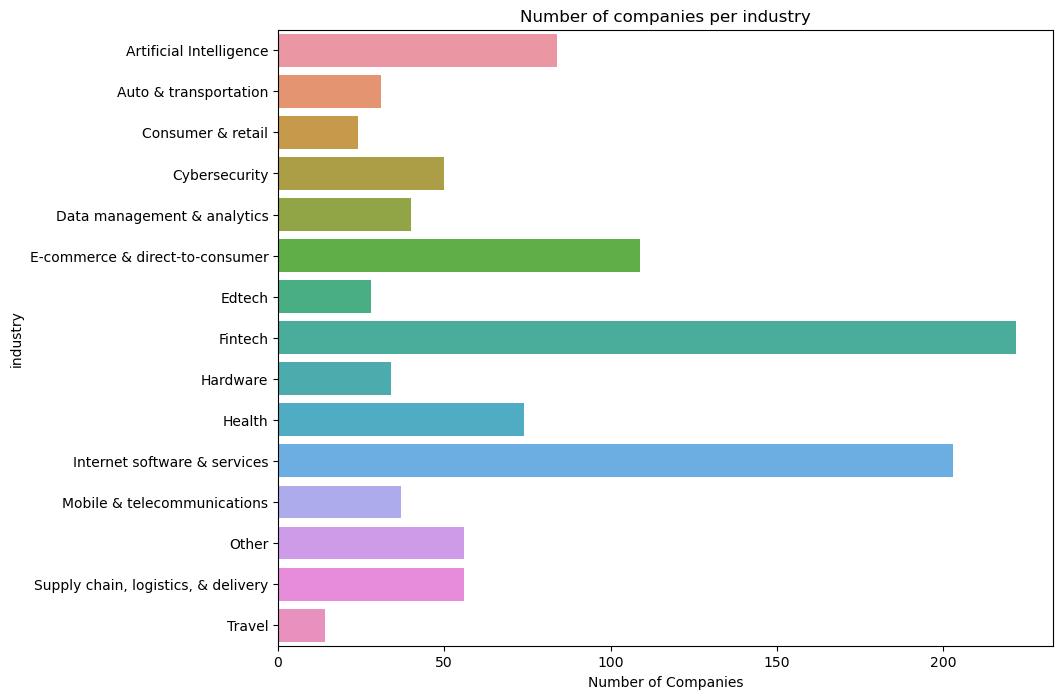

In [23]:
plt.figure(figsize=(10, 8))
plt.title('Number of companies per industry')
sns.barplot(x='Number of Companies', y='industry', data=industry_counts)

In [24]:
industry_counts_after_2007 = companies_after_2007.groupby('industry').size().reset_index(name='Number of Companies')
industry_counts_after_2007

,industry,Number of Companies
0,Artificial Intelligence,81
1,Auto & transportation,30
2,Consumer & retail,20
3,Cybersecurity,45
4,Data management & analytics,35
5,E-commerce & direct-to-consumer,104
6,Edtech,24
7,Fintech,206
8,Hardware,30
9,Health,66


<Axes: title={'center': 'Number of companies per industry'}, xlabel='Number of Companies', ylabel='industry'>

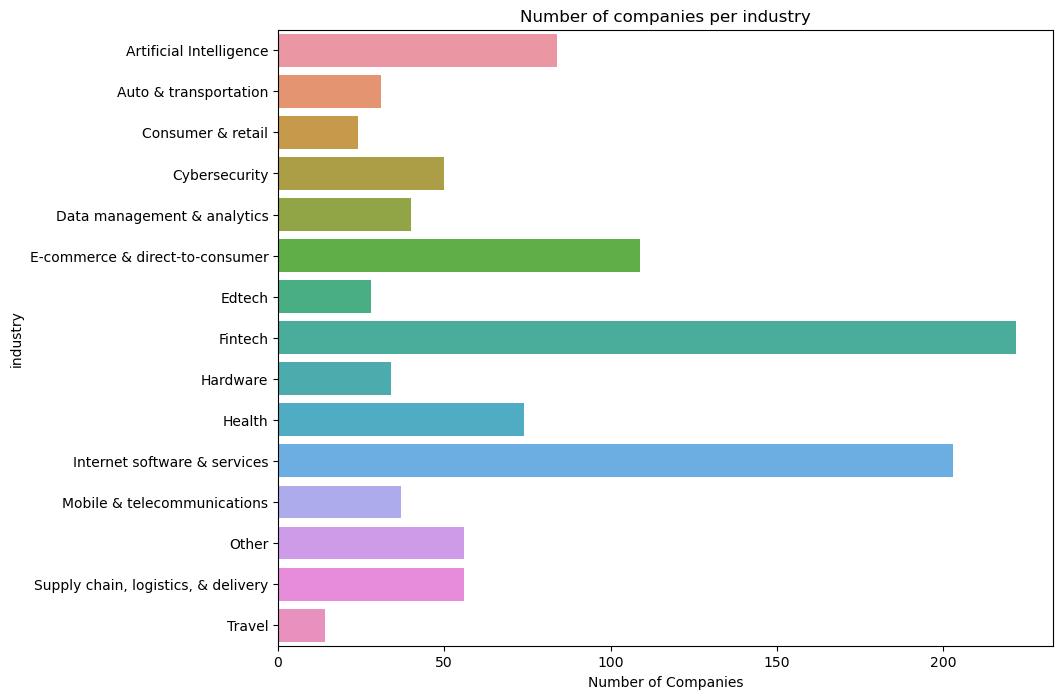

In [25]:
plt.figure(figsize=(10, 8))
plt.title('Number of companies per industry')
sns.barplot(x='Number of Companies', y='industry', data=industry_counts)

- not much changed, lets see the growth of each industry:

In [26]:
industry_growth = companies_after_2007[companies_after_2007['industry'].isin(['Artificial Intelligence', 'Internet software & services', 'E-commerce & direct-to-consumer', 'Fintech', 'Health'])].groupby(['year founded', 'industry']).size().reset_index(name='Number of Companies')
industry_growth

,year founded,industry,Number of Companies
0,2007,Artificial Intelligence,1
1,2007,E-commerce & direct-to-consumer,1
2,2007,Health,2
3,2007,Internet software & services,7
4,2008,Artificial Intelligence,1
...,...,...,...
65,2020,Health,4
66,2020,Internet software & services,4
67,2021,E-commerce & direct-to-consumer,3
68,2021,Fintech,3


<Axes: xlabel='year founded', ylabel='Number of Companies'>

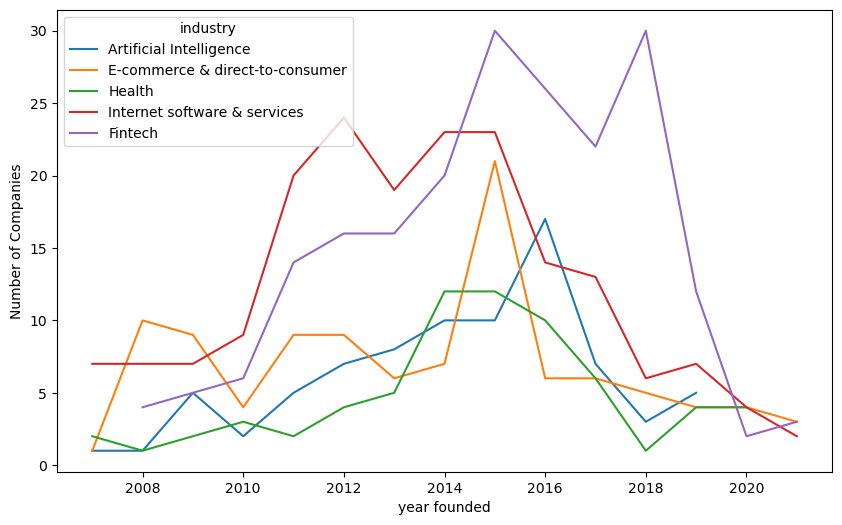

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year founded', y='Number of Companies', hue='industry', data=industry_growth, errorbar=None)


- we can see that all top industry had similar life growing companies count and then stoped, could be due industry is matured enough,

### 3. How does the funding received by each industry relate to their valuations?

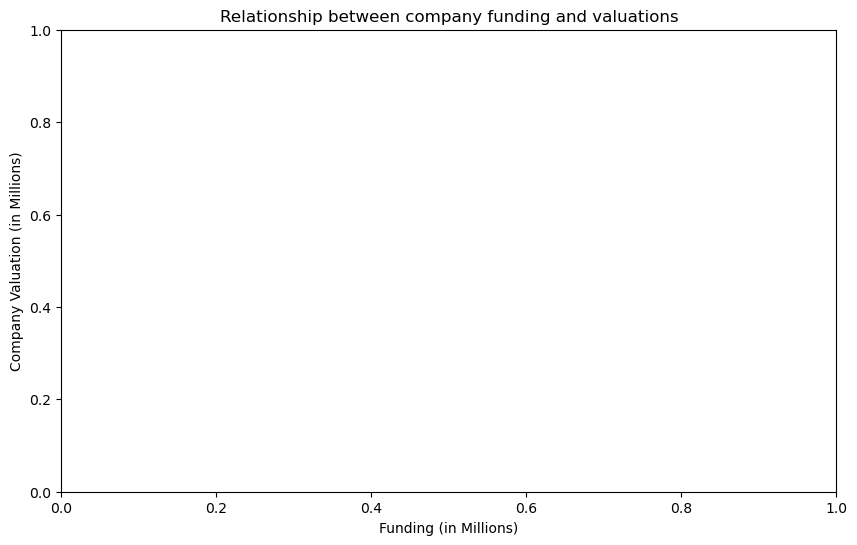

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='funding', y='valuation', data=companies_upd[companies_upd['valuation'] >= 12000], hue='industry')
plt.xlabel('Funding (in Millions)')
plt.ylabel('Company Valuation (in Millions)')
plt.title('Relationship between company funding and valuations')
plt.show()

appearntly the AI industry is the best market to invest in because as showen in the graph you could see that (valuatuin/funding) relation is growing dramatically. which mean less money to invest for more money to get in return.

### 4. Where the most common investors invest? Which prefered country for those investors? Which prefered to industry? it indicate according to those expertise in investing so the assumption here is that they know what they doing so will what they prefer to invest in?

In [38]:
investor_companies = companies_upd.groupby('select investors')['company'].apply(list).reset_index()

common_investors = investor_companies[investor_companies['company'].str.len() > 1]

common_investors = common_investors.reset_index(drop=True)

common_investors

,select investors,company
0,General Atlantic,"[NuCom Group, Gymshark]"
1,"Global Founders Capital, Shea Ventures, Greycroft","[Pacaso, Feedzai]"
2,"Greylock Partners, Google Ventures, BlackRock","[Gelato, Snorkel AI]"
3,"Insight Partners, Sequoia Capital, Index Ventures","[Wiz, Unite Us]"
4,"Pelion Venture Partners, Foundation Capital, T...","[Venafi, Guideline]"
5,"Qualcomm Ventures, Accel, Canaan Partners","[MindTickle, UpGrad]"
6,Sequoia Capital,"[MUSINSA, Retool]"
7,"Sequoia Capital China, Qiming Venture Partners...","[Miaoshou Doctor, Luoji Siwei]"
8,"Shunwei Capital Partners, China Media Group, G...","[Cgtz, Star Charge]"
9,SoftBank Group,"[Cambridge Mobile Telematics, Globality]"


In [ ]:
prefered_country = companies_upd.groupby('country')['select investors'].size().reset_index(name='Number of Investors')
prefered_country

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Number of Investors per Country')
sns.barplot(x='Number of Investors', y='country', data=prefered_country)

In [ ]:
prefered_industry = companies_upd.groupby('industry')['select investors'].size().reset_index(name='Number of Investors')
prefered_industry

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Number of Investors per industry')
sns.barplot(x='Number of Investors', y='industry', data=prefered_industry)

### Conclutions about prefered charactaristic in company investors prefer to invest in:
- prefered country we can see its US, china and india.
- prefered industry is fintech, Internet software & services and Artificial Intelligence, As showen the most prefered industries are in high-tech.

### 5. Which industries have higher company valuations? Find where the best company with valuation  to invest in.

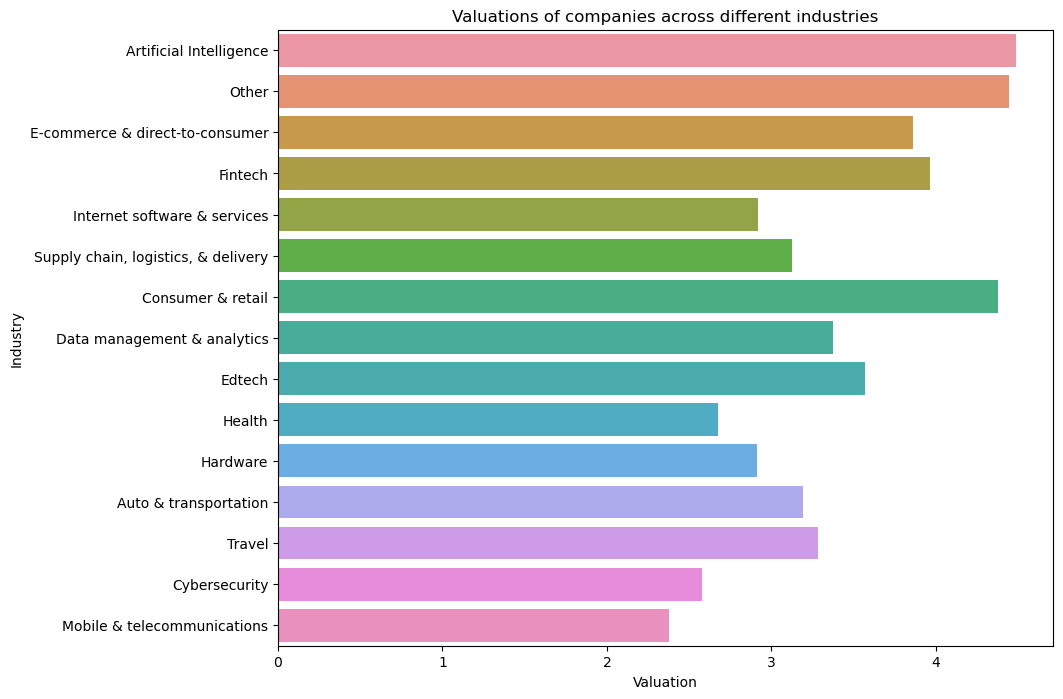

In [31]:
# plt.figure(figsize=(10, 8))
# sns.barplot(x='valuation', y='industry', data=companies_upd, ci=None)
# plt.ylabel('Industry')
# plt.xlabel('Valuation')
# plt.title('Valuations of companies across different industries')
# plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x='valuation', y='industry', data=companies_upd, errorbar=None)
plt.ylabel('Industry')
plt.xlabel('Valuation')
plt.title('Valuations of companies across different industries')
plt.show()


the most have highest valuation are high-tech industries like AI, but also "Consumer & retail" are included regardless there are not in high-tech industry.

### 6. What is the geographical distribution of companies across different continents and countries? find the most place which have the most concentration of companies count. look where is the most countries compatitive?

- Companies count per country:

In [ ]:
company_per_country_count = companies_upd.groupby(['country'])['company'].count().reset_index()
company_per_country_count

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='company', y='country', data=company_per_country_count)
plt.title('Total companies per country')
plt.xlabel('Number of Companies Per Country')

- Companies count per continents:

In [ ]:
company_per_continent_count = companies_upd.groupby(['continent'])['company'].count().reset_index()
company_per_continent_count

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x='continent', y='company', data=company_per_continent_count)
plt.title('Total companies per continent')
plt.ylabel('Number of Companies Per Continent')

According to the graphs we se that US and china has the most compatitive market place which may indicate to the company to the best, and it might also mean the most risky places to invest in.

### 7.  What are top industries in each region?

In [ ]:
industries_by_regions = companies_after_2007.groupby(['continent', 'industry']).size()
industries_by_regions

In [ ]:
for continent in ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']:
    temp = companies_after_2007[companies_after_2007['continent'] == continent].groupby(['industry']).size().reset_index(name='Industry Count').head()
    display(temp)
    plt.pie(temp['Industry Count'], labels = temp['industry'])
    plt.xlabel('Top 5 Industry: {}'.format(continent), size=13)
    plt.show()


##### Ever region has other industry that famuse in its region:
- Africa have just one unicorn company which is in high-tech industry.
- we can see that EU and america are high-tech dominate and AI appear in 3/5 of continent for top 5
- Asia top 2 are AI and transportation

## Step 5. TEST OF HYPOTHESES

#### Is there a significant difference in the average valuation between Artificial Intelligence and health companies?

In [ ]:
companies_upd[companies_upd['industry'].isin(['Artificial  Intelligence', 'Health'])].groupby('industry')['valuation'].describe()

In [ ]:
companies_upd[companies_upd['industry'].isin(['Artificial Intelligence', 'Health'])].groupby('industry')['valuation'].mean().reset_index()

In [ ]:
ai_slice = companies_upd[companies_upd['industry'] == 'Artificial Intelligence']
health_slice = companies_upd[companies_upd['industry'] == 'Health']

sample_1 = ai_slice['valuation'].dropna()
sample_2 = health_slice['valuation'].dropna()

In [ ]:
sample_1.hist(bins=20)

In [ ]:
scipy.stats.shapiro(sample_1)

In [ ]:
sample_2.hist(bins=20)

In [ ]:
scipy.stats.shapiro(sample_2)

In [ ]:
scipy.stats.levene(sample_1, sample_2)

In [ ]:
alpha = 0.5
results = scipy.stats.ttest_ind(
        sample_1, 
        sample_2, equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis. There is a significant difference in the average valuation between AI and health companies.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the average valuation between AI and health companies.")

## Step VII. GENERAL CONCLUSION

During my analysis of the data I found out that there are three crutial parameters to determine whether a company succeeds or not:

- The geographical distribution of companies varies significantly across countries and continents, like china and america contains most of companies.The number of companies in thede countries can provide some insight of success founded companies which attract investors. this also might increased competition, which can make it more challenging for individual companies to succeed.
- Industries AI, consumer & retail, and fintech are the leading industry from the average valualation company prespective, that may suggest that companies within these industries are attracting significant investment and interest from investors. This could be an indicator of perceived potential for growth and profitability within those industries.
- common investors with highest company valuation: Two Sigma Ventures, Flint Capital, Commerce Ventures and Insight Partners, Sequoia Capital, Index Venture. Can indicate potential for growth and profitability within those companies that been invested by those common investors.
- Artificial Intelligence VS Health are differ in average valulation prespective.